# Import Libraries

In [1]:
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


# Data import

In [2]:
train_df = pd.read_csv('C:/Users/DELL/Desktop/Projects/train.csv')


train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
train_df.shape
#train.shape[0]

(891, 12)

In [5]:
test_df = pd.read_csv('C:/Users/DELL/Desktop/Projects/Kaggle/Logistic Reg/test.csv')

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<font color=red>  Note: there is no target variable into test data (i.e. "Survival" column is missing), so the goal is to predict this target using different machine learning algorithms such as logistic regression. </font>


## Missing Data

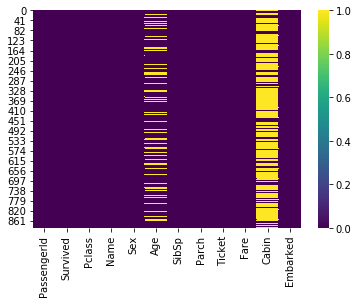

In [6]:
sns.heatmap(train_df.isnull(), cmap='viridis')


In [7]:
train_df.isnull().sum()

train_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64


##    Age - Missing Values

In [8]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Age" records is 19.87%


~20% of entries for passenger age are missing. Let's see what the 'Age' variable looks like in general.

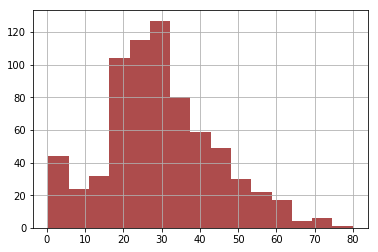

In [9]:
train_df['Age'].hist(bins=15, color='darkred', alpha=0.7)

plt.show()

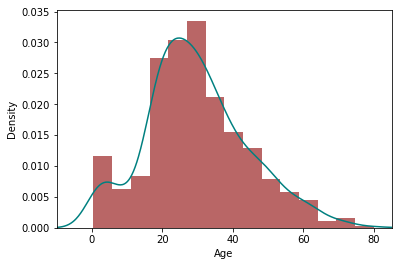

In [10]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='darkred', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')

ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values. 

In [11]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00



##  Cabin - Missing Values

In [12]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


# Data Cleaning

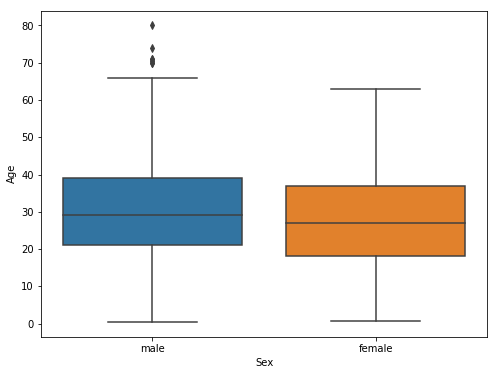

In [13]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='Sex', y='Age', data=train_df)


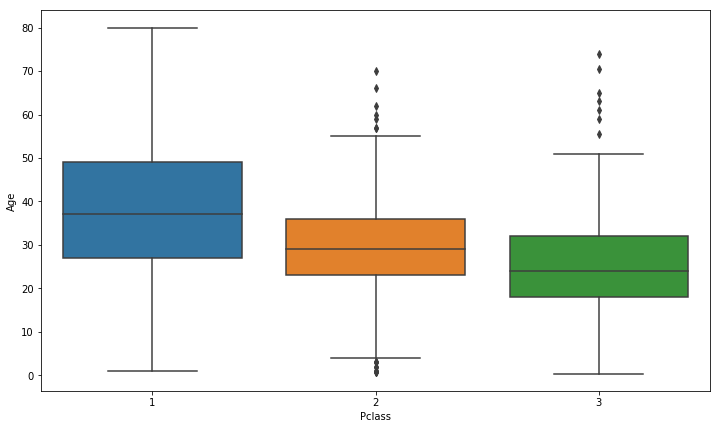

In [14]:
plt.figure(figsize=(12, 7))

sns.boxplot(x='Pclass', y='Age', data=train_df)

#sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [15]:
train_df['Age'].head(8)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
Name: Age, dtype: float64

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age


In [17]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)
train_df['Age'].head(8)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    24.0
6    54.0
7     2.0
Name: Age, dtype: float64

In [18]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

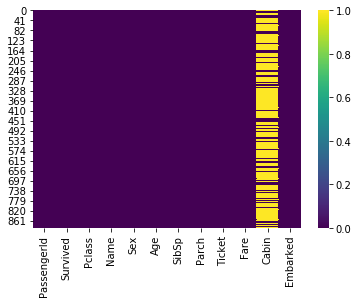

In [19]:
#sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

sns.heatmap(train_df.isnull(), cmap='viridis')
plt.show()

In [20]:
train_df.drop('Cabin', axis=1, inplace=True)


In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Exploratory Data Analysis

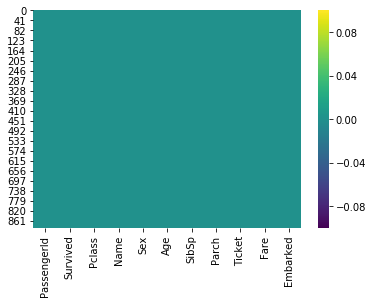

In [22]:
#sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

sns.heatmap(train_df.isnull(), cmap='viridis')
plt.show()

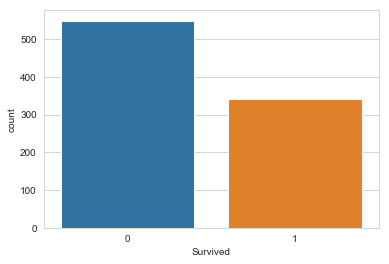

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train_df) 

#sns.countplot(x='Survived', data=train_df, palette='RdBu_r')


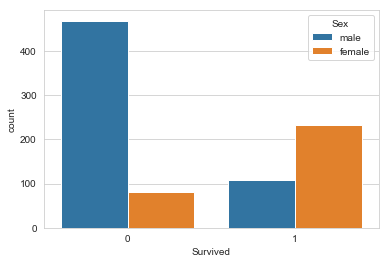

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train_df)

#sns.countplot(x='Survived',hue='Sex',data=train_df,palette='RdBu_r')
plt.show()

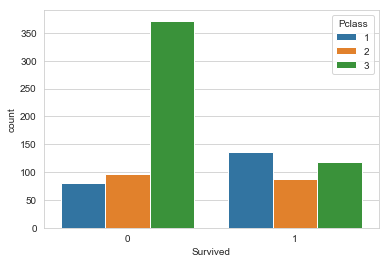

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train_df)


#sns.countplot(x='Survived',hue='Pclass',data=train_df,palette='rainbow')
plt.show()

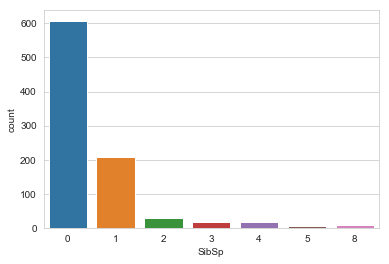

In [26]:
sns.countplot(x='SibSp', data=train_df)

plt.show()

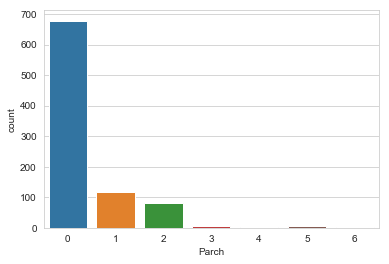

In [27]:
sns.countplot(x='Parch', data=train_df)

plt.show()

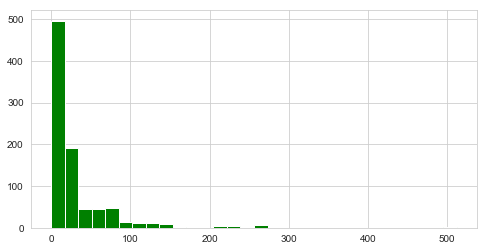

In [28]:
train_df['Fare'].hist(color='green', bins=30, figsize=(8,4))

plt.show()

# Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [30]:
print('Male and Female Count in train data set: \n', train_df['Sex'].value_counts())
print('.......................................\n')
print('Embarked Class Count in train data set: \n', train_df['Embarked'].value_counts())

Male and Female Count in train data set: 
 male      577
female    314
Name: Sex, dtype: int64
.......................................

Embarked Class Count in train data set: 
 S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [31]:
#sex = pd.get_dummies(train_df['Sex'],drop_first=False)
#embark = pd.get_dummies(train_df['Embarked'],drop_first=False)


sex = pd.get_dummies(train_df['Sex'], drop_first=True)
#sex.head()

embark = pd.get_dummies(train_df['Embarked'], drop_first=True)
#embark.head()

In [32]:
train_df.drop(['PassengerId', 'Sex','Embarked','Name','Ticket'], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [33]:
train_df = pd.concat([train_df, sex, embark], axis=1)

In [34]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Standard Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

stand_scaler = sc.fit_transform(train_df)

train_scale = pd.DataFrame(stand_scaler, columns = train_df.columns)
train_scale.head()

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,-0.789272,0.827377,-0.533834,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.615838
1,1.266990,-1.566107,0.674891,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.623803
2,1.266990,0.827377,-0.231653,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.615838
3,1.266990,-1.566107,0.448255,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.615838
4,-0.789272,0.827377,0.448255,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.615838


### Variance inflation factor

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
vif = pd.DataFrame()
train_vif = train_scale.drop(['Survived'], axis = 1)
vif['Features'] = train_vif.keys()
vif

,Features
0,Pclass
1,Age
2,SibSp
3,Parch
4,Fare
5,male
6,Q
7,S


In [38]:
vif['vif'] = [variance_inflation_factor(exog = train_vif.values, exog_idx = i) for i in range(len(train_vif.keys()))]
vif

,Features,vif
0,Pclass,1.859201
1,Age,1.302082
2,SibSp,1.288840
3,Parch,1.330904
4,Fare,1.650887
5,male,1.125128
6,Q,1.489160
7,S,1.464885


### Correlation 

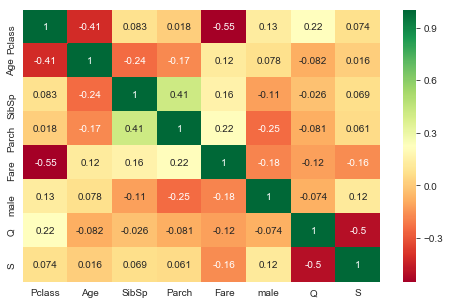

In [39]:
Selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']
X = train_df[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).



# Train Test Split

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [41]:

#We are all set to split the data into train and test

#Independent Variable 
X = train_df.drop('Survived', axis = 1)
X.head()

#Dependent variable
y = train_df['Survived']
y.head()

#Lets use train_test_split to split X and y into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state = 100)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(623, 8) (268, 8) (623,) (268,)


# Libraries for Performing the Logistic_regression using Train and Test 
# Training and Predicting

In [42]:
from sklearn.linear_model import LogisticRegression


#from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score

In [43]:
#fit the model on train data 
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


#predict on train 
train_preds = log_reg.predict(X_train)

print('training data shape:' , train_preds.shape)
print(train_preds)

training data shape: (623,)
[0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1
 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0
 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0
 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1
 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0
 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0
 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Accuracy & Confusion Matrix on train

In [44]:

#accuracy on train
print("Model accuracy on train is: " , accuracy_score(y_train, train_preds))

#Confusion matrix
print("confusion_matrix train is: " )

confusion_matrix(y_train, train_preds)

Model accuracy on train is:  0.812199036918138
confusion_matrix train is: 


array([[344,  46],
       [ 71, 162]], dtype=int64)

In [45]:

#accuracy on train
print("Model accuracy on train is: " )

round(accuracy_score(y_train, train_preds),2)

Model accuracy on train is: 


0.81

In [46]:
#Confusion matrix
print("confusion_matrix train is: " )

confusion_matrix(y_train, train_preds)

confusion_matrix train is: 


array([[344,  46],
       [ 71, 162]], dtype=int64)

In [47]:

#predict on test
test_preds = log_reg.predict(X_test)


print('testing data shape:' , test_preds.shape)

print(test_preds)

testing data shape: (268,)
[1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1
 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0
 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 1 1 0 1 0]


### Accuracy & Confusion Matrix on test

In [48]:
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds))

print("confusion_matrix test is: " )
confusion_matrix(y_test, test_preds)

Model accuracy on test is:  0.7835820895522388
confusion_matrix test is: 


array([[140,  19],
       [ 39,  70]], dtype=int64)

In [49]:

#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds))

#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds))




Model accuracy on train is:  0.812199036918138
Model accuracy on test is:  0.7835820895522388


We got good accuracy which means our model is performing quite well 

In [50]:
#ROC 
print("ROC score on train is: ", roc_auc_score(y_train, train_preds))

print("ROC score on test is: ", roc_auc_score(y_test, test_preds))


ROC score on train is:  0.7886651260041817
ROC score on test is:  0.7613524897582368


# Evaluation
We can check precision,recall,f1-score using classification report!


In [51]:
from sklearn.metrics import confusion_matrix, classification_report

#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report


In [52]:
#train Confusion matrix & Classification report

print(confusion_matrix(y_train, train_preds) )

print(' *********'      )

print('Printing precision, recall, f1-score, support:')
print('                **********        ')
print(classification_report(y_train, train_preds))

[[344  46]
 [ 71 162]]
 *********
Printing precision, recall, f1-score, support:
                **********        
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       390
           1       0.78      0.70      0.73       233

   micro avg       0.81      0.81      0.81       623
   macro avg       0.80      0.79      0.79       623
weighted avg       0.81      0.81      0.81       623



In [53]:
#test Confusion matrix & Classification report

print(confusion_matrix(y_test, test_preds) )

print(' *********'      )

print('Printing precision, recall, f1-score, support:')
print('                **********        ')
print(classification_report(y_test,test_preds))

[[140  19]
 [ 39  70]]
 *********
Printing precision, recall, f1-score, support:
                **********        
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       159
           1       0.79      0.64      0.71       109

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



In [54]:
!pip install scikit-plot

In [55]:
import scikitplot as skplt
import matplotlib.pyplot as plt

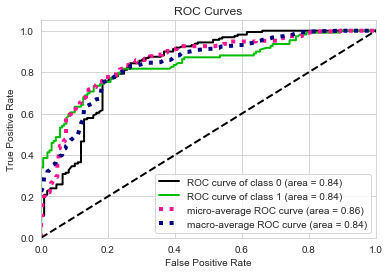

In [56]:
skplt.metrics.plot_roc(y_test, log_reg.predict_proba(X_test))
plt.show()


In [57]:
fpr, tpr, thresh = roc_curve(y_test, test_preds)

auc(fpr, tpr)

0.7613524897582368

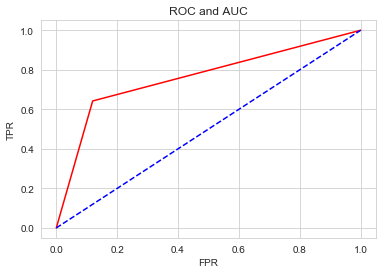

In [58]:
# ROC and AUC

plt.plot(fpr, tpr, 'r')
plt.plot([0,1], [0,1], 'b--')
plt.xlabel('FPR'), plt.ylabel('TPR')
plt.title('ROC and AUC')
plt.show()

### Building the Logistic_Regression with Statsmodel

In [59]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [60]:
train_df.keys()

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [61]:
import statsmodels.formula.api as sfa
import statsmodels.api as sa

In [62]:
model = sfa.glm( formula='Survived~Pclass+Age+SibSp+Parch+Fare+male+Q+S',
                data = train_df, family = sa.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -391.16
Date:                Wed, 18 Mar 2020   Deviance:                       782.33
Time:                        22:52:17   Pearson chi2:                     918.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5375      0.590      9.378      0.000       4.380       6.695
Pclass        -1.1819      0.150     -7.904      0.0

In [63]:
model = sfa.glm(formula='Survived~Pclass+Age+SibSp+Fare+male+Q+S',
                data = train_df, family = sa.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -391.45
Date:                Wed, 18 Mar 2020   Deviance:                       782.89
Time:                        22:52:17   Pearson chi2:                     925.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5289      0.589      9.392      0.000       4.375       6.683
Pclass        -1.1951      0.148     -8.057      0.0

In [64]:
model = sfa.glm(formula='Survived~Pclass+Age+SibSp+male+Q+S',
                data = train_df, family = sa.families.Binomial())
result = model.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -391.64
Date:                Wed, 18 Mar 2020   Deviance:                       783.29
Time:                        22:52:17   Pearson chi2:                     925.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6963      0.526     10.832      0.000       4.666       6.727
Pclass        -1.2377      0.132     -9.389      0.0

In [65]:
model = sfa.glm(formula='Survived~Pclass+Age+SibSp+male+S',
                data = train_df, family = sa.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -391.69
Date:                Wed, 18 Mar 2020   Deviance:                       783.37
Time:                        22:52:17   Pearson chi2:                     928.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6822      0.523     10.864      0.000       4.657       6.707
Pclass        -1.2478      0.127     -9.804      0.0

In [66]:
#model = sfa.glm(formula='Survived~Pclass+Age+SibSp+male',
    #            data = train_df, family = sa.families.Binomial())
#result = model.fit()
#print(result.summary())

In [67]:
train_df.keys()

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [68]:
A = train_df.drop(columns = ['Survived', 'Parch', 'Fare', 'Q','S'], axis = 1)
A.head()

B = train_df["Survived"]
B.head()

#Lets use train_test_split to split A and B into train and test 
A_train, A_test, B_train, B_test = train_test_split(A, B, train_size=0.7, test_size = 0.3, random_state = 100)

print(A_train.shape, A_test.shape, B_train.shape, B_test.shape)

(623, 4) (268, 4) (623,) (268,)


In [69]:
A.keys()

Index(['Pclass', 'Age', 'SibSp', 'male'], dtype='object')

### After Removing of Columns , based on P-value 0.05

In [70]:
#fit the model on train data 
log_reg = LogisticRegression()
log_reg.fit(A_train, B_train)


#predict on train 
train_preds = log_reg.predict(A_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(B_train, train_preds))

#predict on test
test_preds = log_reg.predict(A_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(B_test, test_preds))


#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(B_train, train_preds))
print("ROC score on test is: ", roc_auc_score(B_test, test_preds))

#Confusion matrix
print("confusion_matrix train is: \n", confusion_matrix(B_train, train_preds))
print("confusion_matrix test is: \n", confusion_matrix(B_test, test_preds))

Model accuracy on train is:  0.8089887640449438
Model accuracy on test is:  0.7873134328358209
ROC score on train is:  0.7826455375811598
ROC score on test is:  0.7644971438462871
confusion_matrix train is: 
 [[346  44]
 [ 75 158]]
confusion_matrix test is: 
 [[141  18]
 [ 39  70]]


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


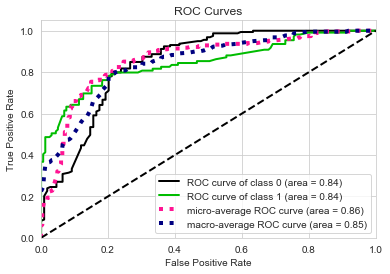

In [71]:
skplt.metrics.plot_roc(B_test, log_reg.predict_proba(A_test))
plt.show()

In [72]:
fpr, tpr, thresh = roc_curve(B_test, test_preds)

auc(fpr, tpr)

0.7644971438462871

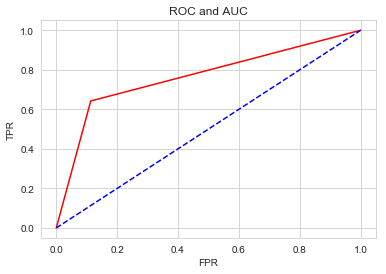

In [73]:
# ROC and AUC

plt.plot(fpr, tpr, 'r')
plt.plot([0,1], [0,1], 'b--')
plt.xlabel('FPR'), plt.ylabel('TPR')
plt.title('ROC and AUC')
plt.show()

In [74]:
A.keys()

Index(['Pclass', 'Age', 'SibSp', 'male'], dtype='object')

### lmplot

In [75]:
#sns.lmplot(x ='male',  y = 'Survived', data = train_df, logistic = True)
#plt.show()

# Decision Tree Classifiction

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt_model=DecisionTreeClassifier()

dt_model.fit(A_train, B_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
dt_preds = dt_model.predict(A_test)

In [79]:
print(confusion_matrix(B_test, dt_preds))

[[142  17]
 [ 34  75]]


In [80]:
print(classification_report(B_test, dt_preds))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       159
           1       0.82      0.69      0.75       109

   micro avg       0.81      0.81      0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



# Random Forest Classification

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf= RandomForestClassifier( n_estimators=500 )
rf.fit(A_train, B_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
rf_preds=rf.predict(A_test)

In [84]:

print(confusion_matrix(B_test, rf_preds))


[[141  18]
 [ 26  83]]


In [85]:
print(classification_report(B_test, rf_preds))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       159
           1       0.82      0.76      0.79       109

   micro avg       0.84      0.84      0.84       268
   macro avg       0.83      0.82      0.83       268
weighted avg       0.84      0.84      0.83       268



In [86]:
accuracy_score(B_test, rf_preds)

0.835820895522388

# Now Using test dataset

In [87]:
test_df = pd.read_csv('C:/Users/DELL/Desktop/Projects/Kaggle/Logistic Reg/test.csv')

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [88]:
test_df.shape

(418, 11)

In [89]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [90]:
test_df.drop('Cabin', axis=1, inplace=True)

In [91]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [92]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [93]:
test_df['Age'] = test_df[['Age','Pclass']].apply(impute_age, axis=1)

In [94]:
sex_test = pd.get_dummies(test_df['Sex'], drop_first=True)
embark_test= pd.get_dummies(test_df['Embarked'], drop_first=True)


In [95]:
test_df.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [96]:
test_df = pd.concat([test_df, sex_test, embark_test], axis=1)

test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [97]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [98]:
rf = RandomForestClassifier( n_estimators=1000 )

In [99]:
rf.fit(train_df.drop(['Survived'], axis=1), train_df['Survived'] )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
test_prediction = rf.predict(X_test)

In [101]:
print(test_prediction.shape)
test_prediction

(268,)


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0], dtype=int64)

In [102]:
test_pred = pd.DataFrame(test_prediction, columns= ['Survived'])
test_pred.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [103]:
new_test = pd.concat([test_df, test_pred], axis=1, join='inner')

In [104]:
new_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,892,3,34.5,0,0,7.8292,1,1,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,1
2,894,2,62.0,0,0,9.6875,1,1,0,1
3,895,3,27.0,0,0,8.6625,1,0,1,1
4,896,3,22.0,1,1,12.2875,0,0,1,0


In [105]:
df= new_test[['PassengerId' ,'Survived']]

In [106]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,0


In [107]:
df.to_csv('predictions.csv' , index=False)